# Clase 12: Visualizacion de Datos


**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

Clase Basada en el Post [**The Art and Science of Data Visualization**](https://towardsdatascience.com/the-art-and-science-of-data-visualization-6f9d706d673e) de [Michael Mahoney](https://medium.com/@mike.mahoney.218)

## Objetivos de la Clase

1. Introducirlos a las visualizaciones de datos y sus principios. 
2. Entregar ejemplos de visualizaciones.
3. Introducirlos al uso de `plotly` para generar gráficos interactivos.

## Visualización de Datos


La visualización de datos es un area dedicada a representar gráficamente los datos con el objetivo de poder comunicar información de forma eficiente y sencilla.


En terminos prácticos, es una función que mapea los datos a un gráfico. El mapeo determina entre otras cosas: 
    
- Elementos visuales que se mostrarán.
- Posición de los elementos.
- Color de los elementos
- Forma y tamaño de los elementos.



El tipo de mapeo que creemos determinará que tan entendible el gráfico será. Por ende, **es de suma importancia crear buenos mapeos**. 

Un gráfico "bonito/estético" está mucho más allá de formalidades matemáticas. Por ende, la visualización de datos es considerada tanto una ciencia como también un arte.

Si bien, la librería "por defecto" de graficado en python es `Matplotlib`, en este curso usaremos `plotly` como librería para generar las visualizaciones debido principalmente a sus interfaces y su interactividad.

### Los Principios

Según *The Art and Science of Data Visualization*, una buena visualización debe cumplir los siguientes principios:


1. **Un buen gráfico cuenta una historia.**

2. **Todo debe ser hecho de la forma más sencilla posible, pero no debe ser simple.**

3. **Se debe usar la herramienta correcta para el trabajo a resolver.**

4. **La tinta es barata, los electrones aún más.**



> Nota: Lo simple es llano, fácil, falto de profundidad. Lo sencillo es certero, esencial, preciso, sobrio, escueto, claro y puede también ser modesto. Fuente: [Diferencia entre simple y sencillo](https://elpais.com/elpais/2020/01/14/del_tirador_a_la_ciudad/1579025106_976460.html).


Cada uno de estos los veremos a continuación

## Pinguinos 🐧


**Palmer Archipelago (Antarctica) penguin data**: 


*Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.*

https://github.com/allisonhorst/palmerpenguins

![Pinguinos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/lter_penguins.png)


    
    
    

### Atributos
 
- `culmen_length_mm`: Largo del culmen (vértice o borde superior de la mandíbula)  (mm).
- `culmen_depth_mm`: Alto del culmen (vértice o borde superior de la mandíbula) (mm).
- `flipper_length_mm`: Longitud de las aletas (mm).
- `body_mass_g`: Masa corporal (g).
- `island`: Isla de origen (Dream, Torgersen, or Biscoe) en el archipiélago de Palmer (Antarctica).
- `sex`: Sexo del pinguino.
- `species`: Especie del pinguino (Chinstrap, Adélie, or Gentoo)
    
![Detalle Variables](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)
    
<center>Créditos a Allison Horst por sus excelentes ilustraciones https://github.com/allisonhorst </center>    
    


In [1]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/MDS7202/MDS7202/main/recursos/2023-01/12-Visualizaciones/penguins.csv"
)
df = df.dropna()
df


species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[334 rows x 7 columns]

---

## 1.- Un Buen Gráfico Cuenta Una Historia


Cuando construimos un gráfico, es importante entender para que lo estamos construyendo.
Para esto, es preciso pensar por qué y para qué lo estamos creando.




### ¿Por qué creamos los gráficos?

Comunmente puede caer en dos categorías: 

1. **Gráficos exploratorios**, los cuales se enfocan en identificar patrones en los datos.
2. **Gráficos explicativos**, los cuales se enfocan en explicar los patrones encontrados en los datos.

In [2]:
import plotly.express as px

#### Gráficos Exploratorios

Los gráficos exploratorios son comunmente gráficos muy simples de nuestros datos. Su objetivo es **identificar patrones y cómo ocurren en nuestros datos**.


> **Pregunta ❓**: ¿Dado el datasets de los pinguinos, que sería interesante explorar?

In [3]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE


Tomemos por ejemplo, el siguiente gráfico de dispersión en donde relacionamos el largo de la aleta con la masa corporal:

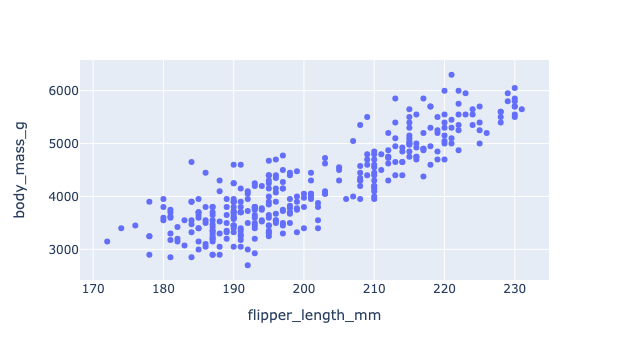

In [3]:
px.scatter(
    df,
    x="flipper_length_mm",
    y="body_mass_g",
)


Para este caso, podemos observar claramente que existe un patrón entre ambas variables: a medida que `flipper_lenght_mm` aumenta, también lo hace `body_mass_g`. 

**El objetivo final (para nosotros) de esta visualización sería entonces entender cómo es esta relación.**

En el siguiente ejemplo se muestra la relación entre el largo y profundidad del culmen:

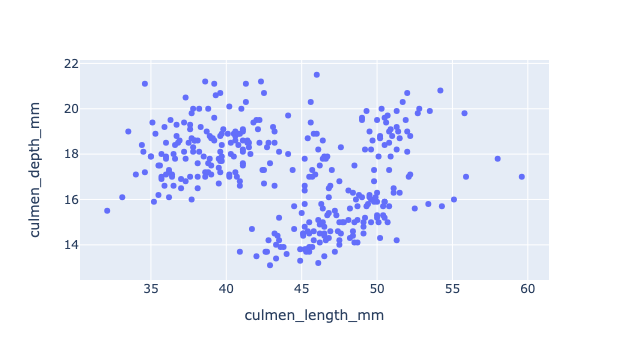

In [4]:
px.scatter(
    df,
    x="culmen_length_mm",
    y="culmen_depth_mm",
)


A diferencia del gráfico anterior, en esta figura no podemos inferir ninguna relación a simple vista.

#### Gráficos Explicativos

Este tipo de gráficos intenta inlcuir **explicaciones del por qué suceden los patrones**.

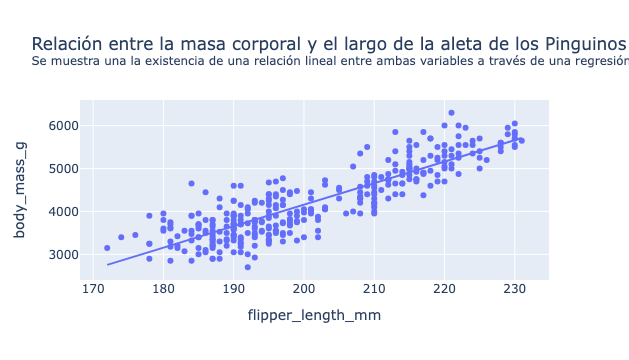

In [5]:
fig = px.scatter(
    df,
    x="flipper_length_mm",
    y="body_mass_g",
    trendline="ols",
    title=(
        "Relación entre la masa corporal y el largo de la aleta de "
        "los Pinguinos"
        "<br><sup>Se muestra una la existencia de una relación lineal "
        "entre ambas variables a través de una regresión lineal con "
        "un buen ajuste (R² = 0.759).</sup></br>"
    ),
)
fig.show()

> **Pregunta ❓**: Entonces, cuál es la diferencia entre el gráfico exploratorio y el explicativo?

Noten que la diferencia entre el gráfico exploratorio y el explicativo no es lo pulido que es este, si no que en este caso se intenta incluir una explicación a los patrones detectados.

### ¿Cómo contamos la Historia?

Obviamente existe una infinidad de posibles combinaciones de gráficos y sus elementos para representar visualmente un objeto. La idea es que podamos seleccionar la mejor.
Podemos utilizar para esto dos criterios:


1. **Expresividad:** Un conjunto de hechos es expresable en un lenguaje visual si las visualizaciones en el lenguaje expresan todos los hechos del conjunto de datos y sólo los hechos de los datos. 

2. **Eficacia:** Una visualización es más eficaz que otra si la información transmitida por una visualización se percibe más fácilmente que la información de la otra visualización.


...que en términos más sencillos se podrían traducir en: 

1. **Solo decir la verdad y nada más que la verdad (no se debe mentir ni tampoco mentir por omisión)**
2. **Utilizar solo los elementos que la gente pueda entender mejor (donde mejor = más rápido y/o más preciso).**



---

## 2.- Todo debe ser hecho de la forma más sencilla posible, pero no debe ser simple

El gráfico más simple es el gráfico de dispersión en 2 dimensiones, el cuál representa en 2D un par de variables de nuestro dataset.

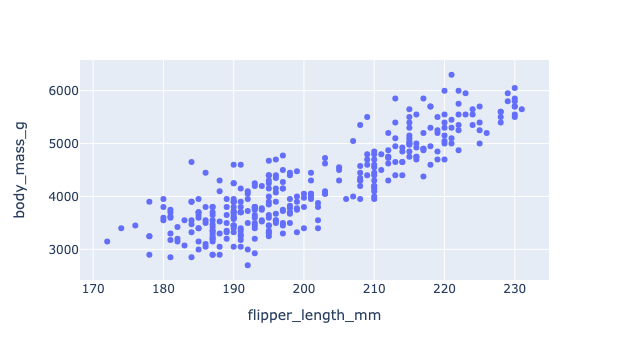

In [6]:
px.scatter(df, x="flipper_length_mm", y="body_mass_g")

En esta figura, tanto el eje X (largo de la aleta) como el eje Y (masa) tiene una escala y cada punto recae sobre una combinación de una posición en los ejes. Esta es toda la información que podemos representar hasta el momento.

> **Pregunta ?**: ¿Cuál es el problema de este tipo de gráficos?

> **Pregunta ?**: Entonces, ¿Cómo podríamos visualizar más variables?

In [8]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

Una posible solución sería agregar más dimensiones a nuestra visualización:

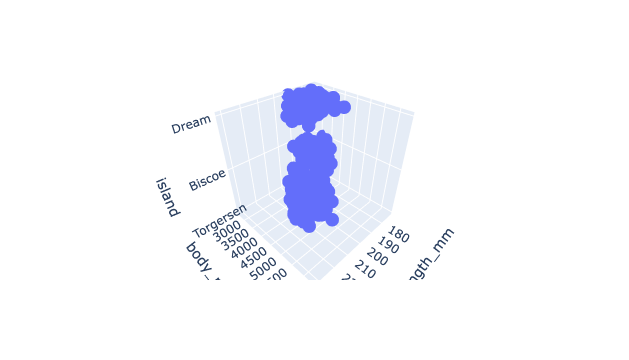

In [7]:
px.scatter_3d(df, x="flipper_length_mm", y="body_mass_g", z="island")

> **Pregunta ❓**: ¿Cuál es el problema de los gráficos en 3D? ¿Cómo podríamos seguir agregando variables?

Sin emabrgo, esto puede provocar que incremente la dificultad para comprender lo que se comunica, sobre todo si se representa una variable con mayor desorden:

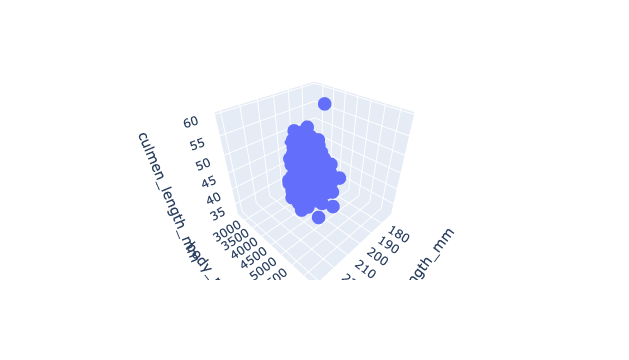

In [10]:
px.scatter_3d(df, x="flipper_length_mm", y="body_mass_g", z="culmen_length_mm")

Y el mayor problema: No podemos agregar otra dimensión mas.


> **Pregunta ❓**: Entonces, nuevamente viene la pregunta: ¿Cómo podemos visualizar más variables?

### Aesthetics o Parámetros de la Figura

> *Estética según wikipedia: La estética es la rama de la filosofía que estudia la esencia y la percepción de la belleza y el arte.*


No solo disponemos de la posición de los puntos sobre sus ejes para poder representar más de dos variables datos, si no que además contamos con elementos extra como: 




 1. Posición
 2. Color
 3. Forma
 4. Tamaño 
 
Cada uno de estos parámetros y sus combinaciones nos permitirán agregar nuevas variables a nuestros gráficos. 

### 1. Posición

La distancia entre los valores del eje X o Y representa que tan larga la variable es. La gente tiene a considerar que mientras mas lejos está un punto, más grande y extremo es su valor. Veamos esto a través de un sencillo ejemplo en donde generamos un punto que está fuera de los patrones:

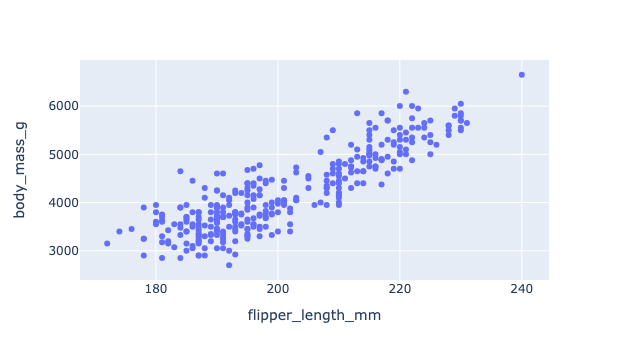

In [8]:
# solo como ejemplo, modificaremos una medición de peso a 500
df_ = df.copy()
df_.loc[343, "flipper_length_mm"] = 240
df_.loc[343, "body_mass_g"] = 6650

px.scatter(
    df_,
    x="flipper_length_mm",
    y="body_mass_g",
)

Si vien, se ve a simple vista que este punto está fuera de lo esperado, puede en terminos prácticos, no sea realmente así. Para mostrar esto, crearemos el mismo gráfico con el eje X partiendo desde 0.

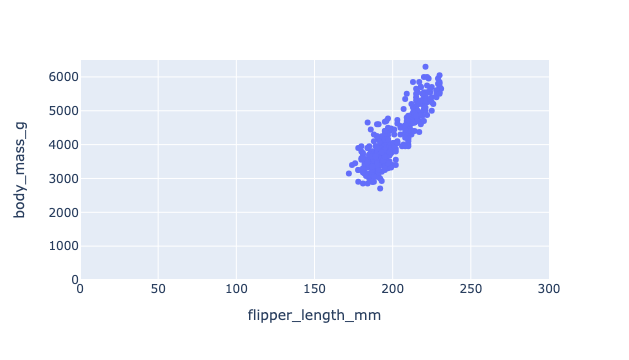

In [12]:
px.scatter(df_, x="flipper_length_mm", y="body_mass_g", range_x=(0, 300), range_y=(0, 6500))

Aquí pueden notar que en la práctica, no está tan lejos como pensabamos en un inicio respecto al 0. 



Otro ejemplo para gráficos con variables categóricas.


<br>
<div align='center'/>

<img src='https://raw.githubusercontent.com/MDS7202/MDS7202/main/recursos/2023-01/12-Visualizaciones/grafico_charcha.jpg' />
</div>

> **Pregunta ❓**: ¿Qué hay de malo con este gráfico?

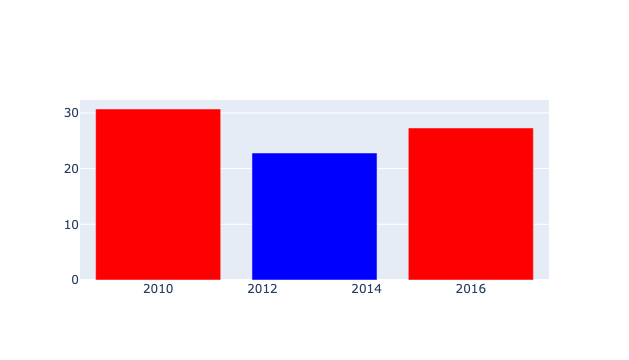

In [9]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(
            x=[2010, 2013, 2016],
            y=[30.7, 22.8, 27.3],
            marker_color=["red", "blue", "red"],
        )
    ]
)
fig.show()

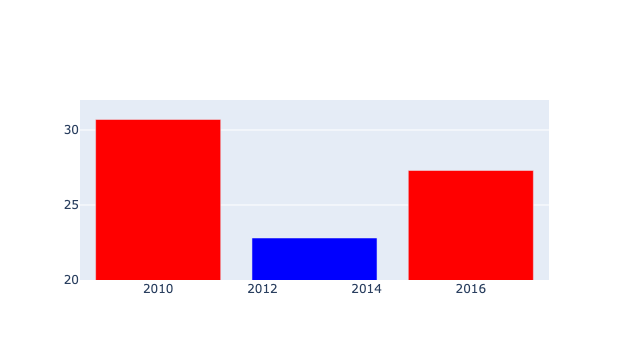

In [10]:
fig.update_yaxes(range=[20, 32])
fig.show()

La moraleja de esta sección es que es común que se asuma que los gráficos parten siempre desde 0, aunque esto no sea siempre así. Siempre hay que tener esto en mente al momento de diseñar las visualizaciones

#### Para Concluir

La moraleja de esta sección es que al momento de diseñar una visualización se debe tener en cuenta el rango/escala de las variables que se están graficando. Una escala distinta puede llevar a gráficos con interpretaciones totalmente distintas.

### Color


Si bien, la sección anterior nos dio una gran idea de lo cuidadosos que hay que ser al tratar con los ejes y la posición de los datos, aún no sabemos como incluir una nueva variable dentro de las visualizaciones.

**Spoiler**: Podemos lograrlo usando colores.


Como ejemplo, incluyamos la isla en donde se tomo la medición de cada pinguino:

In [11]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

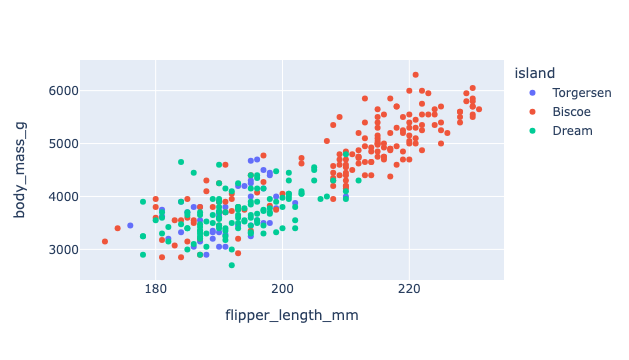

In [12]:
fig = px.scatter(
    df,
    x="flipper_length_mm",
    y="body_mass_g",
    color="island",
)

fig.show()


Noten que en este caso el color representa una variable categórica, en donde cada isla tomó un color en particular.


> **Pregunta ❓**: Entonces, ¿cómo represento una variable numérica al trabajr con colores?


#### Luminiscencia

Sin emabrgo, si fuese una variable continua, estos colores nada nos dirían con respecto a la magnitud de esta nueva variable. 

Para poder representar podemos usar paletas de colores continuas, en donde se utiliza un conjunto de colores con distinta **luminiscencia** (que tanto brilla un color) de tal forma que algunos colores indican bajo valor y otros alto.

En este caso, el gráfico incluye una variable que no está representada por los puntos del gráfico de dispersión.

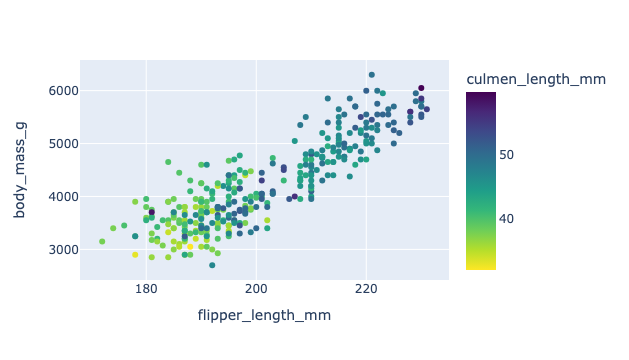

In [17]:
fig = px.scatter(
    df,
    x="flipper_length_mm",
    y="body_mass_g",
    color="culmen_length_mm",
    color_continuous_scale="viridis_r"
)


fig.show()


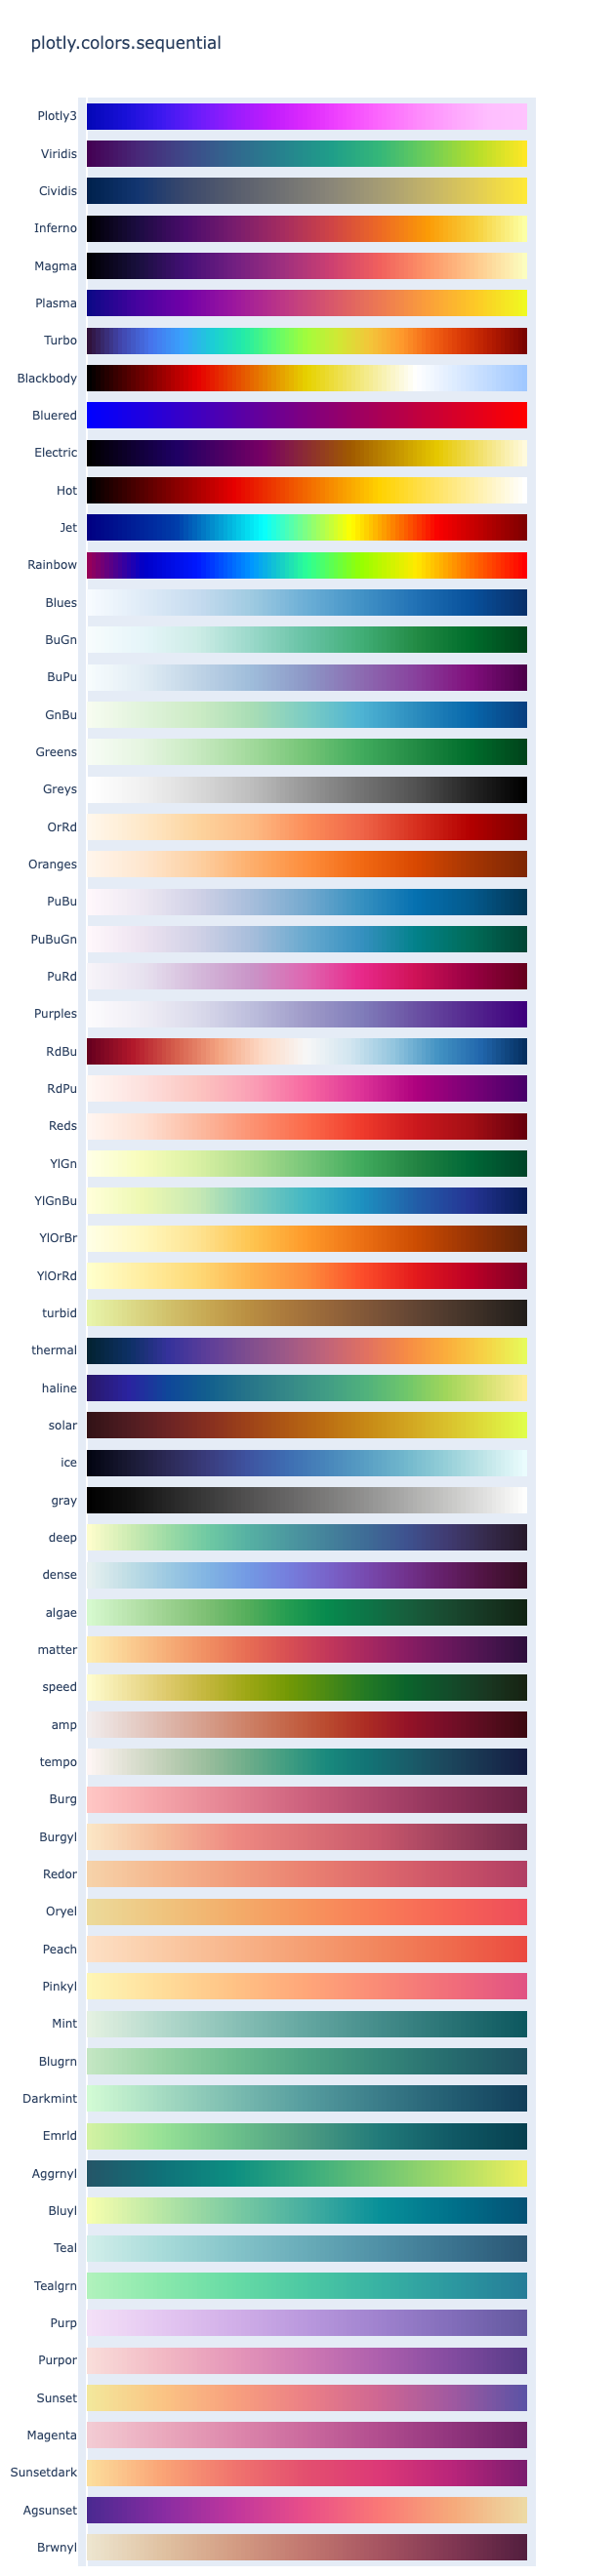

In [13]:
# un vistazo de todas las paletas de colores continuas disponibles

fig = px.colors.sequential.swatches_continuous()
fig.show()

Consideremos ahora el siguiente ejemplo, en donde generamos 15 bins para `body_mass_g` y después los graficamos

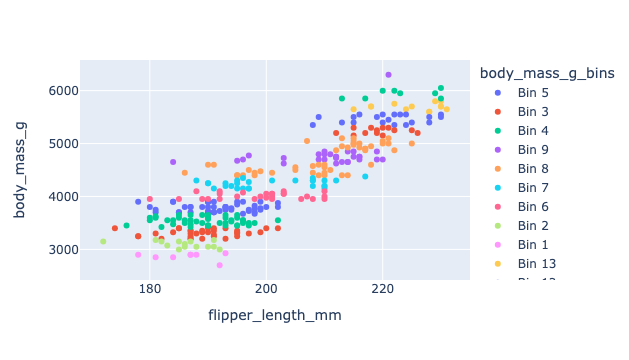

In [14]:
df_ = df.copy()
df_.loc[:, "body_mass_g_bins"] = pd.cut(
    df.loc[:, "body_mass_g"], 15, labels=[f"Bin {i+1}" for i in range(0, 15)]
)

fig = px.scatter(
    df_,
    x="flipper_length_mm",
    y="body_mass_g",
    color="body_mass_g_bins",
    color_continuous_scale="viridis_r",
)


fig.show()


> **Pregunta❓**: ¿Cuál es el problema en este gráfico?

**Cuidado con los colores!**

Tiende a pasar que se sobreutilizan los colores. Esto induce finalmente a que el color tienda a confundir más que a ayudar.

> **Pregunta ❓** ¿Qué precauciones debemos tener al usar colores en nuestras visualizaciones?


Relacionado: [viridis](https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html)

### Forma

Otro parámetro que también nos permitiría incluir una variable es la forma de los puntos.

In [15]:
species_symbol = df.loc[:, "species"].replace(
    {"Adelie": "circle", "Gentoo": "square", "Chinstrap": "star"}
)

df["species_symbol"] = species_symbol
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex species_symbol  
0       3750.0    MALE         circle  
1       3800.0  FEMALE         circle  
2       3250.0  FEMALE         circle  
4       3450.0  FEMALE         circle  
5       3650.0    MALE         circle

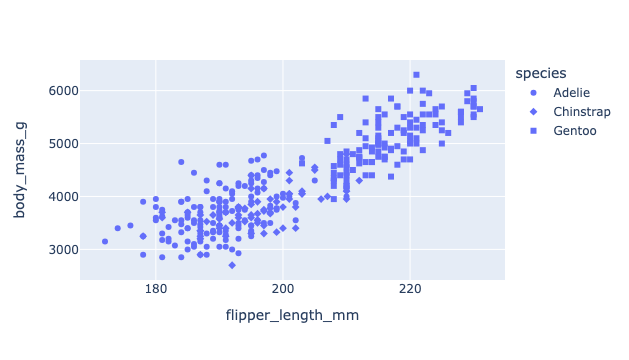

In [16]:
fig = px.scatter(
    df, x="flipper_length_mm", y="body_mass_g",  symbol="species"
)
#.update_traces(marker=dict(size=12), selector=dict(mode='markers'))


fig.show()

Al igual que el color por categoría, los símbolos no permiten distinguir las magnitudes de las variables. 


> **Nota:** `plotly` permite de todas formas combinar colores continuos con símbolos, sin embargo, la leyenda deja de funcionar correctamente. 

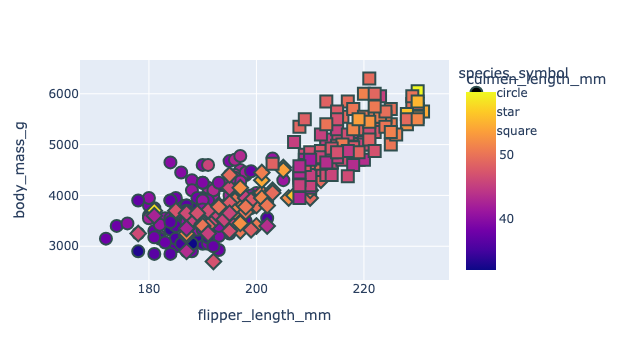

In [18]:
fig = px.scatter(
    df,
    x="flipper_length_mm",
    y="body_mass_g",
    color="culmen_length_mm",
    symbol="species_symbol",
)

fig.update_traces(
    marker=dict(size=12, line=dict(width=2, color="DarkSlateGrey")),
    selector=dict(mode="markers"),
)

fig.show()

La leyenda puede ser desactivada modificarla usando: 

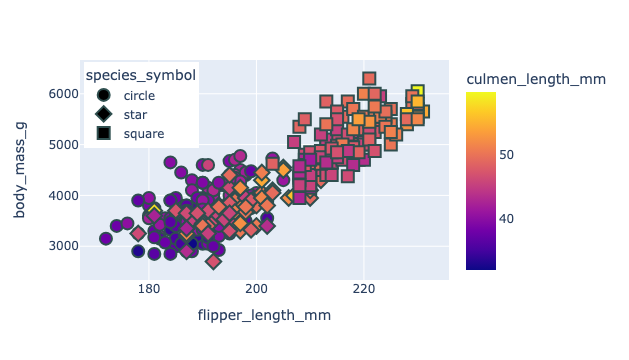

In [19]:
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()

> **Pregunta:** ¿Cuántas formas distintas máximas deberían usarse?

Ojalá no más de 4

### Tamaño

El último punto a considerar es el tamaño de cada punto, el cual permite también establecer relación entre las observaciones.

In [20]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex species_symbol  
0       3750.0    MALE         circle  
1       3800.0  FEMALE         circle  
2       3250.0  FEMALE         circle  
4       3450.0  FEMALE         circle  
5       3650.0    MALE         circle

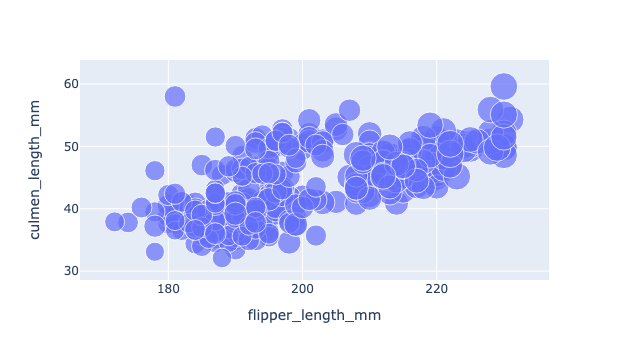

In [21]:
fig = px.scatter(
    df,
    x="flipper_length_mm",
    y="culmen_length_mm",
    size="body_mass_g",
    size_max=20,
)

fig.show()


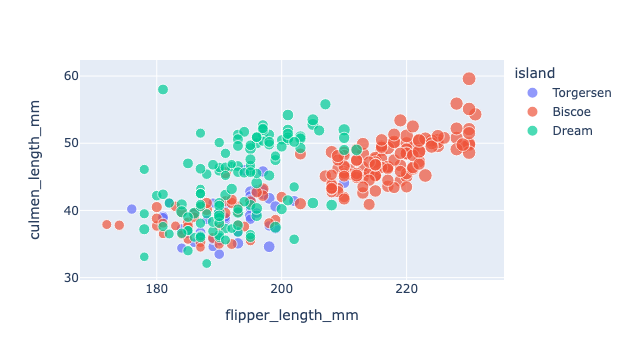

In [22]:
fig = px.scatter(
    df,
    x="flipper_length_mm",
    y="culmen_length_mm",
    color="island",
    size="body_mass_g",
    size_max=10,
)

fig.show()

### Cierre


Según el árticulo original del cual está basado esta clase, el ser humano percibe estos parámetros según el siguiente orden:

1. Posición
2. Tamaño
3. Color
4. Forma

Obviamente ustedes deciden a cual darle más importancia. Lo importante es tener en mente que no por tener muchs elementos la visualización será mejor, si no que **todo debe ser hecho de la forma más sencilla posible, pero no debe ser simple**

## 3.- Usar el Gráfico Correcto para la Tarea por Resolver

Cada tipo de tarea que queramos resolver a tiene asociado uno o varios tipo de gráficos que le permitirían visualizar los datos.

Aquí debemos escoger:

1. La herramienta para graficar.
2. La visualización que mejor se ajuste a lo que queremos representar.

### Plotly

`Plotly` es una biblioteca de visualización de datos interactiva que permite crear gráficos y visualizaciones personalizadas de alta calidad en varios lenguajes de programación como Python, R y JavaScript.

En particular, para el curso estaremos usando `Plotly Express`, el es una capa de interfaz de alto nivel que simplifica la creación de gráficos mediante la automatización de muchas de las tareas comunes de visualización y una alta compatiblidad con las herramientas de ciencia de datos como numpy o pandas.


`Plotly express` incluye 30 distintos tipos de gráficos en una interfaz muy unificada y sencilla basada en funciones que usualmente siguen la siguiente sintaxis:


```python
px.{nombre_del_grafico} (
    {df},
    x={variable},
    y={variable_2},
    color={variable_color},
    ... # otras configuraciones
)

```

Cada gráfico cuenta con una extensa documentación. Por ejemplo para generar scatters, buscar en google [`px.scatter`](https://www.google.com/search?q=px.scatter) y ver tanto el manual de usuario como la API asociada.

### Scatter o Gráfico de Dispersión


Este (como hemos visto en las secciones anteriores) permite representar cada observación a través de puntos ubicado en los dos ejes de un plano cartesiano. 

Todos los detalles en: https://plotly.com/python/line-and-scatter/


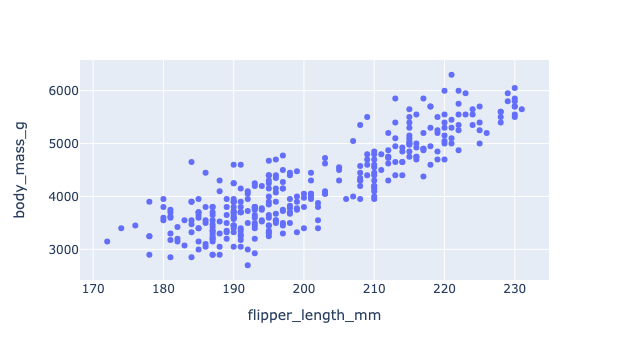

In [23]:
px.scatter(
    df,
    x="flipper_length_mm",
    y="body_mass_g",
)


> **Nota:** Un problema de los scatter plot es que dos puntos ubicados en la misma posición serán indistinguibles entre si.


Una forma de solucionar esto es agregar un pequeño movimiento aleatorio a los puntos. Esto se puede obtener a través de los strip charts:

https://plotly.com/python/strip-charts/

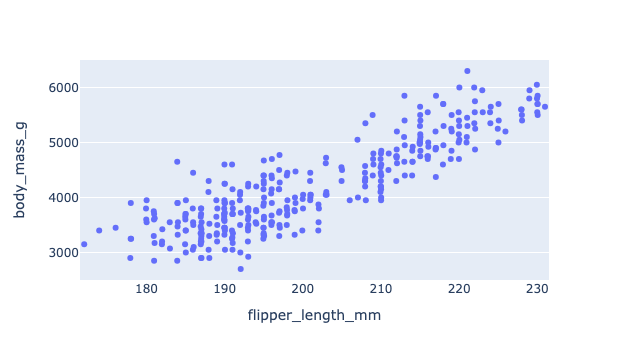

In [26]:
px.strip(df, x="flipper_length_mm", y="body_mass_g")

### Gráficos de Linea

En el caso de tener una variable temporal, podemos utilizar gráficos de linea para representar su cambio:

In [27]:
px.data.gapminder().head(10)

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
5  Afghanistan      Asia  1977   38.438  14880372  786.113360       AFG   
6  Afghanistan      Asia  1982   39.854  12881816  978.011439       AFG   
7  Afghanistan      Asia  1987   40.822  13867957  852.395945       AFG   
8  Afghanistan      Asia  1992   41.674  16317921  649.341395       AFG   
9  Afghanistan      Asia  1997   41.763  22227415  635.341351       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4  
5        4  
6        4  
7        4  
8        4  
9        4

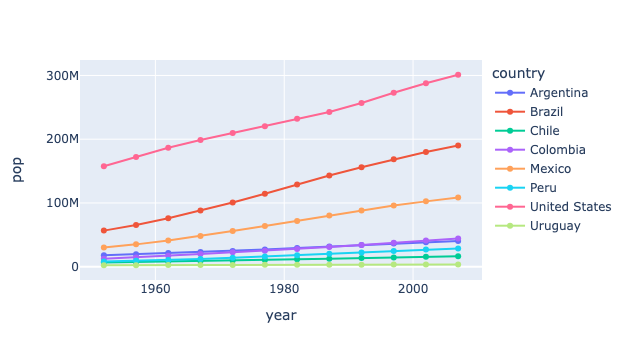

In [28]:
df_gapminder = px.data.gapminder()
df_gapminder = df_gapminder[
    df_gapminder.country.isin(
        [
            "Chile",
            "Argentina",
            "Peru",
            "Brazil",
            "Colombia",
            "Mexico",
            "United States",
            "Uruguay",
        ]
    )
]

fig = px.line(df_gapminder, x="year", y="pop", color="country", markers=True)
fig.show()

### Scatter Matrix

https://plotly.com/python/splom/

Nos permite generar multiples scatters que detalla la interacción entre múltiples variables.

C:\Users\gabri\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



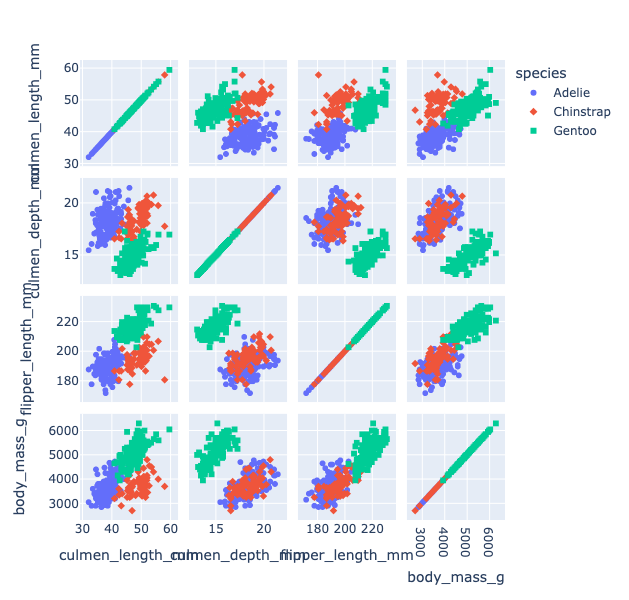

In [29]:
fig = px.scatter_matrix(
    df,
    height=600,
    dimensions=[
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ],
    symbol="species",
    color="species",
)
fig.show()

### Coordenadas Paralelas

Forma alternativa de graficar varias variables en una:

C:\Users\gabri\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



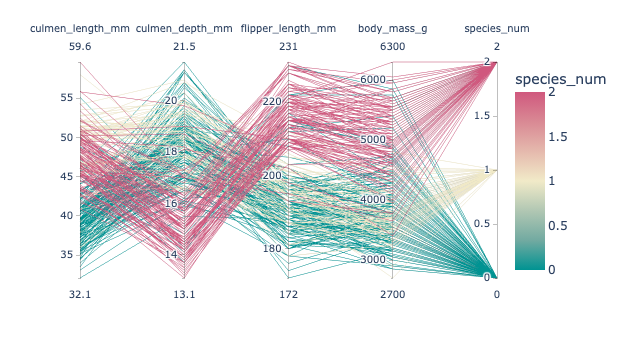

In [30]:
# mapeo de clases a números
df["species_num"] = df["species"].replace({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})

fig = px.parallel_coordinates(
    df,
    color="species_num",
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=1,
)
fig.show()

### Histogramas

Los histogramas permiten observar como distribuyen las variables a través de un conteo de estas.

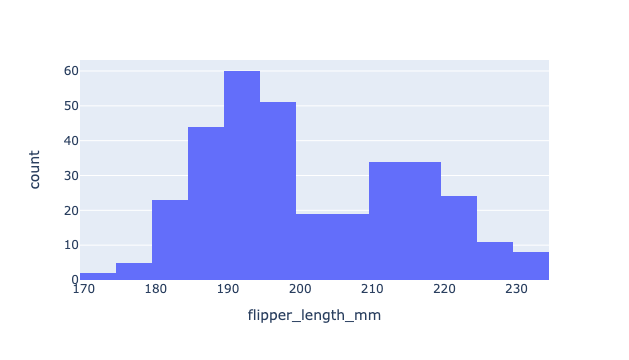

In [31]:
fig = px.histogram(df, x="flipper_length_mm")
fig.show()

Un detalle muy importante de los histogramas es como se generan las particiones de los rangos de cada barra (también conocidos como **bins**)


Bins muy finos pueden llevar a discontinuidades:

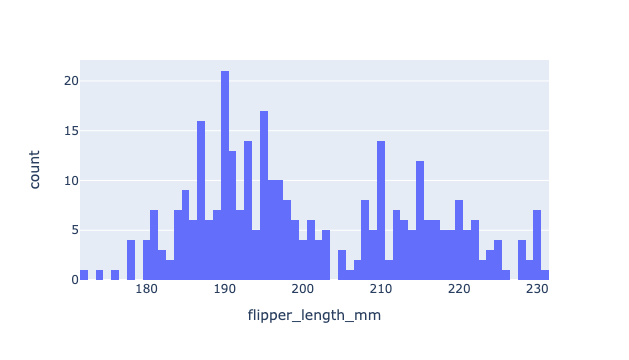

In [32]:
fig = px.histogram(df, x="flipper_length_mm", nbins=100)
fig.show()

Bins muy grandes pueden llevar a distorsionar la información:

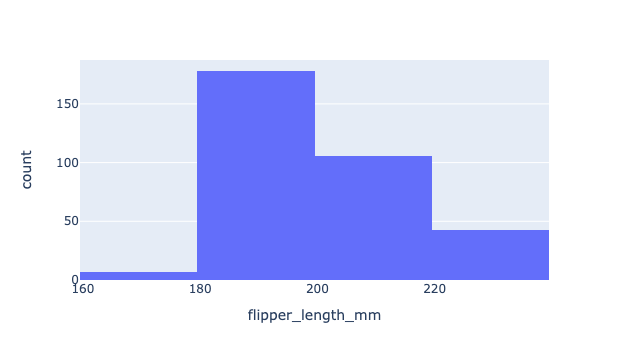

In [35]:
fig = px.histogram(df, x="flipper_length_mm", nbins=5)
fig.show()

Podemos agregar más información a los histogramas a través del color:

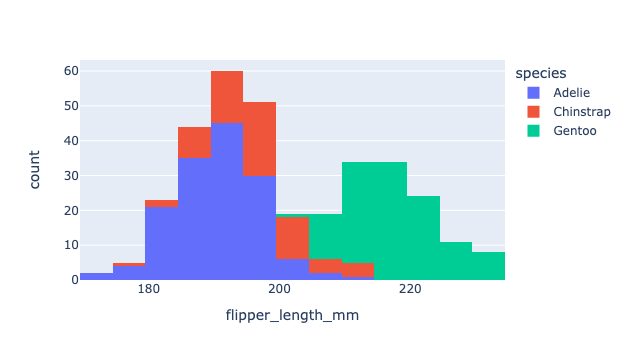

In [33]:
fig = px.histogram(df, x="flipper_length_mm", color="species")
fig.show()

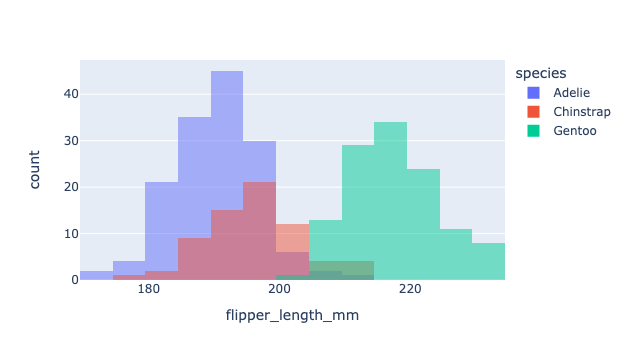

In [35]:
fig = px.histogram(df, x="flipper_length_mm", barmode="overlay", color="species", )
fig.show()

Hay que ser muy cuidadoso si se le agrega color!
El gráfico anterior es muy complicado de entender. Sería mejor separar por grupos las barras.

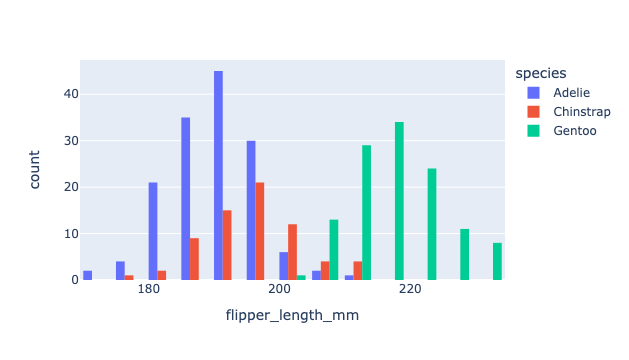

In [36]:
fig = px.histogram(df, 
                   x="flipper_length_mm", 
                   color="species", 
                   barmode="group",)
fig.show()

### Torta

Permiten ilustrar proporciones de una variable.


In [38]:
df_grouped = (
    df.groupby(["island"])
    .agg({"species": "count"})
    .div(len(df))
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={'species': 'cantidad'})
)
df_grouped

island  cantidad
0     Biscoe     49.10
1      Dream     36.83
2  Torgersen     14.07

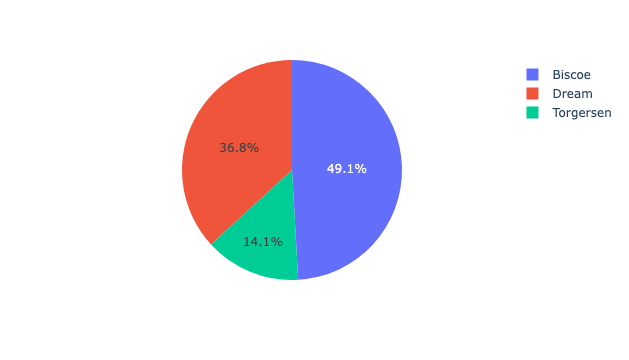

In [39]:
px.pie(df_grouped, values="cantidad", names="island")

### Boxplots

Permiten visualizar cuartiles y outliers de una variable.


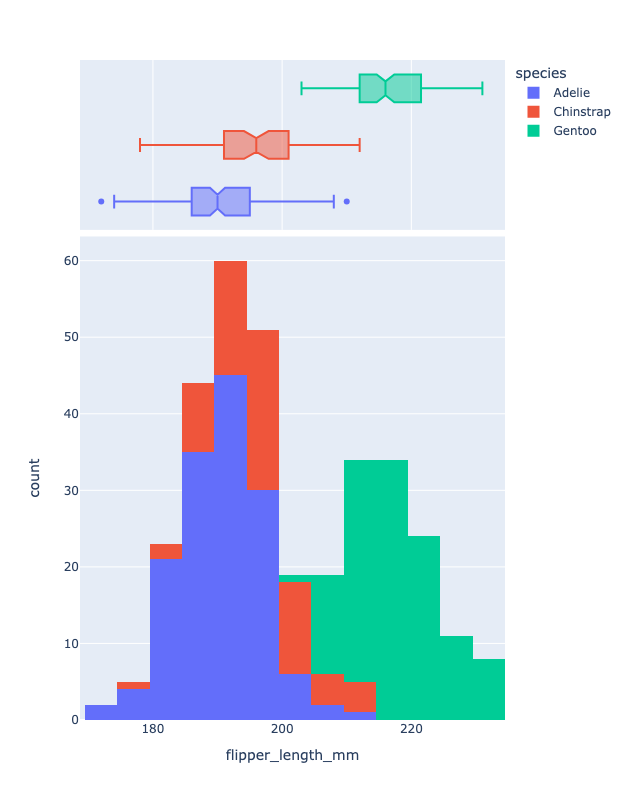

In [41]:
px.histogram(df, x="flipper_length_mm", color="species", marginal='box', height=800)

### Violin

Permiten ver la distribución de distintas variables


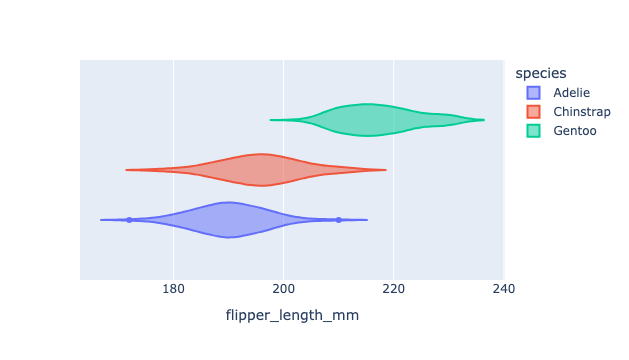

In [42]:
px.violin(df, x="flipper_length_mm", color="species")

Otros gráficos interesantes:

- Sunbrust: Gráfico de torta con más de una variable.
- Coroplético: Coloreo de regiones en un mapa.
- Gráficos de calor: muestra la densidad de una variable en una zona.
- Gran etc...

Visitar https://plotly.com/python/ para más información.

---

## 4.- La Tinta es Barata, los Electrones Aún Más

El último se refiere al hecho de que no es necesario intentar incluir todos los aspectos que se quiera analizar en un solo gráfico, si no que por el contrario, podemos crear múltiples gráficos con distintos grupos por analizar sin mayores problemas. En terminos prácticos, el separar un gráfico implica una ventaja inesperada: incluir una nueva variable al análisis también conocida como el grupo de separación.

> La Tinta es Barata, los Electrones Aún Más -> Hace más de un gráfico!

El siguiente ejemplo muestra como podemos hacer un análisis diferenciado por especie del peso y el tamaño de la aleta.

In [43]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex species_symbol  species_num  
0       3750.0    MALE         circle            0  
1       3800.0  FEMALE         circle            0  
2       3250.0  FEMALE         circle            0  
4       3450.0  FEMALE         circle            0  
5       3650.0    MALE         circle            0

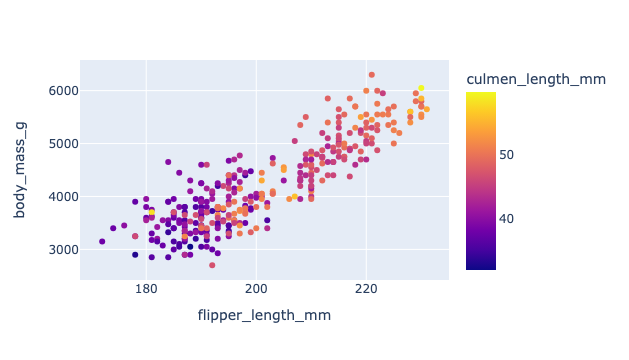

In [44]:
fig = px.scatter(df, x="flipper_length_mm", y="body_mass_g", color="culmen_length_mm")
fig.show()

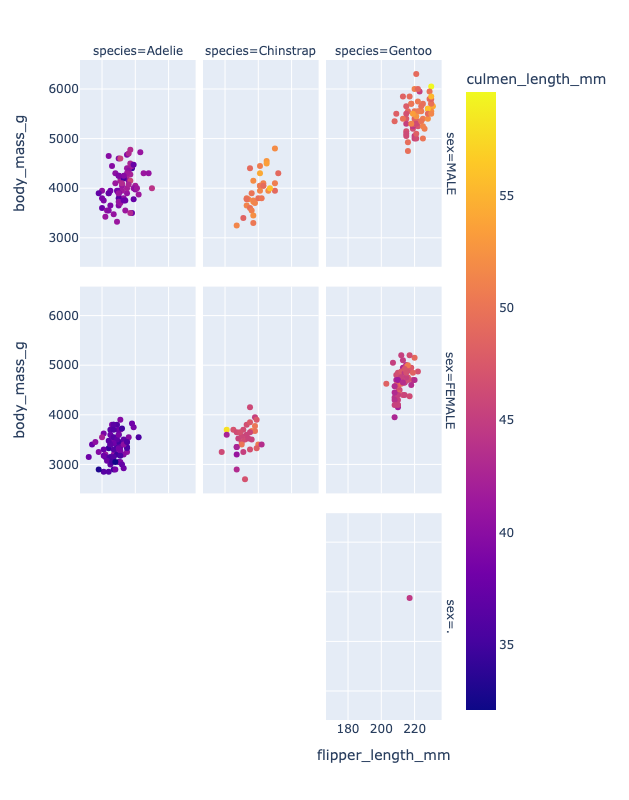

In [45]:
fig = px.scatter(
    df, x="flipper_length_mm", 
    y="body_mass_g", 
    color="culmen_length_mm", 
    facet_col="species",
    facet_row="sex",
    height=800
)

fig.show()

### Extra: Templates y Recorrido por la Documentación


https://plotly.com/python/templates/

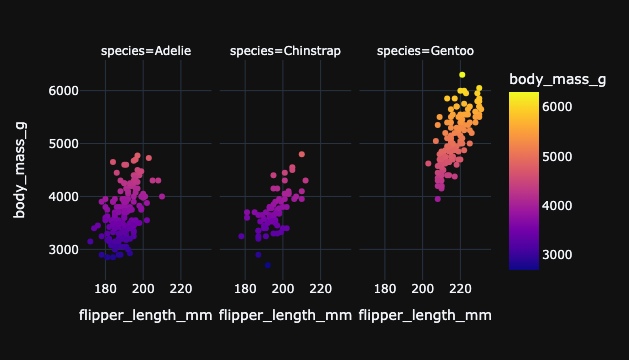

In [46]:
fig = px.scatter(
    df,
    x="flipper_length_mm",
    y="body_mass_g",
    color="body_mass_g",
    facet_col="species",
    template="plotly_dark",
)

fig.show()